# INMET METHEOROLOGICAL STATIONS - EXPLORATORY DATA ANALYSIS

#### Import modules and libraries

In [19]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns; sns.set()
from IPython.display import clear_output as co

#### Load data

In [663]:
class Data:
    path = '../../../Dados/Desafio COR-Rio IV/Meio Ambiente Clima/'

inmet = pd.read_csv(Data.path + 'Meteorologia_INMET.csv'); inmet.head(3)

,primary_key,id_estacao,data,horario,pressao,pressao_minima,pressao_maxima,temperatura_orvalho,temperatura_orvalho_minimo,temperatura_orvalho_maximo,...,umidade_maxima,temperatura,temperatura_minima,temperatura_maxima,rajada_vento_max,direcao_vento,velocidade_vento,radiacao_global,acumulado_chuva_1_h,data_particao
0,A602-2012-04-01 21:00:00,A602,2012-04-01,21:00:00,1014.5,1014.5,1014.7,NaN,NaN,NaN,...,NaN,24.3,24.2,24.7,5.0,NaN,4.0,74.565,0.0,2012-04-01
1,A602-2012-04-01 17:00:00,A602,2012-04-01,17:00:00,1014.5,1014.5,1015.0,NaN,NaN,NaN,...,NaN,25.9,25.2,26.6,5.1,NaN,4.1,2817.476,0.0,2012-04-01
2,A602-2012-04-01 16:00:00,A602,2012-04-01,16:00:00,1015.0,1014.9,1015.7,NaN,NaN,NaN,...,NaN,25.9,24.6,26.3,4.7,NaN,3.8,2913.985,0.0,2012-04-01


---
# 1. Exploratory Data Analysis

### 1. Data types

In [664]:
id_cols = ['primary_key', 'id_estacao', 'data', 'horario', 'data_particao']
float_cols = list(set(inmet.columns).difference(id_cols))

### 2. Index and identity columns

#### Unique index values count

In [665]:
idx = ['Unique Index Values', 'Dataset Size']
vls = [inmet['primary_key'].unique().shape[0], inmet.shape[0]]

pd.DataFrame(vls, idx, ['Rows'])

,Rows
Unique Index Values,964871
Dataset Size,1036001


Duplicate index keys found. The number of unique index values does not match the index size.

#### Unique identity columns' combinations count

In [666]:
inmet.groupby(id_cols[1:4]).first().shape

(964871, 19)

The count of combinations of the three identity columns should match the index size. The number of combinations found match the number of unique index values found.

### 3. Primary keys duplicates

#### Primary key column duplicates count

In [667]:
key_count = inmet['primary_key'].value_counts()
dup_keys = key_count[key_count>1]

dup_keys.shape[0], (dup_keys==2).all()

(71130, True)

Every duplicate key can be found exactly twice.

#### Sample duplicates

In [668]:
inmet.set_index('primary_key').loc[dup_keys.sample(2).index]

,id_estacao,data,horario,pressao,pressao_minima,pressao_maxima,temperatura_orvalho,temperatura_orvalho_minimo,temperatura_orvalho_maximo,umidade,...,umidade_maxima,temperatura,temperatura_minima,temperatura_maxima,rajada_vento_max,direcao_vento,velocidade_vento,radiacao_global,acumulado_chuva_1_h,data_particao
primary_key,,,,,,,,,,,,,,,,,,,,,
A636-2020-11-27 14:00:00,A636,2020-11-27,14:00:00,1013.6,1013.5,1013.9,21.1,19.9,22.1,NaN,...,NaN,30.3,29.4,30.6,5.4,NaN,2.1,3632.095,0.0,2020-11-27
A636-2020-11-27 14:00:00,A636,2020-11-27,14:00:00,1012.2,1012.2,1012.6,18.7,18.4,20.2,NaN,...,NaN,30.4,30.4,31.4,7.8,NaN,3.3,3323.100,0.0,2020-11-27
A652-2021-01-04 12:00:00,A652,2021-01-04,12:00:00,1008.5,1008.4,1008.6,22.2,21.9,23.7,NaN,...,NaN,27.0,26.9,28.0,4.4,NaN,3.0,2473.076,0.0,2021-01-04
A652-2021-01-04 12:00:00,A652,2021-01-04,12:00:00,1007.7,1007.6,1008.1,22.7,21.9,23.2,NaN,...,NaN,28.6,28.0,29.1,4.6,NaN,3.1,3898.300,0.0,2021-01-04


Obs:
* Some stations have two records for the same date and time
* Rows with the same index key do not contain the same values but values are very close, as if they were sequential or very close in time. Hint: Average duplicates in data cleaning.

### 4. Date time description

In [669]:
dt = pd.to_datetime(inmet['data'] + ' ' + inmet['horario'])

#### Start and end of time series

In [670]:
dt.min(), dt.max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2022-06-02 23:00:00'))

Obs: Twelve and a half years from 2010.

#### Unique date times

In [673]:
len(dt.unique())

108852

#### Date time range size

In [674]:
new_index = pd.date_range(dt.min(), dt.max(), freq='H')

len(new_index)

108864

In [676]:
new_index

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               ...
               '2022-06-02 14:00:00', '2022-06-02 15:00:00',
               '2022-06-02 16:00:00', '2022-06-02 17:00:00',
               '2022-06-02 18:00:00', '2022-06-02 19:00:00',
               '2022-06-02 20:00:00', '2022-06-02 21:00:00',
               '2022-06-02 22:00:00', '2022-06-02 23:00:00'],
              dtype='datetime64[ns]', length=108864, freq='H')

#### All missing hours in dataset

In [680]:
missing_hours = list(set(new_index).difference(pd.DatetimeIndex(dt.unique())))
len(missing_hours), missing_hours

(12,
 [Timestamp('2022-04-13 20:00:00', freq='H'),
  Timestamp('2022-04-13 23:00:00', freq='H'),
  Timestamp('2022-05-12 18:00:00', freq='H'),
  Timestamp('2022-05-12 22:00:00', freq='H'),
  Timestamp('2022-04-13 21:00:00', freq='H'),
  Timestamp('2022-04-13 22:00:00', freq='H'),
  Timestamp('2022-04-13 19:00:00', freq='H'),
  Timestamp('2022-05-12 23:00:00', freq='H'),
  Timestamp('2022-05-12 21:00:00', freq='H'),
  Timestamp('2022-05-12 20:00:00', freq='H'),
  Timestamp('2022-05-12 17:00:00', freq='H'),
  Timestamp('2022-05-12 19:00:00', freq='H')])

#### Time range in days

In [31]:
time_range = ts.index.max() - ts.index.min(); time_range

Timedelta('4535 days 23:00:00')

#### Time range in hours

In [32]:
time_range.days * 24 + time_range.seconds / 60 / 60

108863.0

### 5. Missing Values

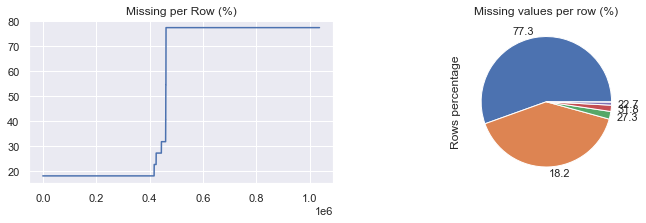

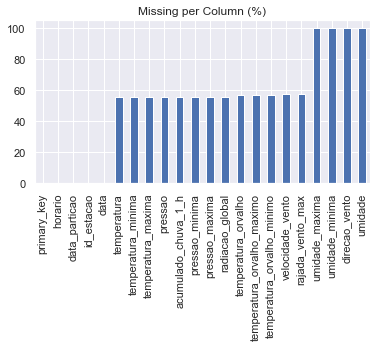

In [686]:
#### Missing per row

fig, ax = plt.subplots(1, 2, figsize=(12, 3))
nan_prct = (100 * inmet.isna().sum(1).sort_values() / inmet.shape[1]).rename('Missing Percantage')
nan_prct.reset_index(drop=True).plot(title='Missing per Row (%)', ax=ax[0])

nan_prct = (inmet.isna().sum(1).value_counts().sort_index()/len(inmet)).rename('Rows percentage')
nan_prct.index = (100 * nan_prct.index.values / inmet.shape[1]).round(1)
nan_prct.sort_values(ascending=False).iloc[:5].plot.pie(title='Missing values per row (%)', ax=ax[1]); plt.show()

#### Missing per column

nan_prct = (100 * inmet.isna().sum().sort_values() / len(inmet)).rename('Missing Percantage')
nan_prct.plot.bar(title='Missing per Column (%)', figsize=(6, 3)); plt.show()

---
# 1. Data Cleaning

#### Average duplicates

In [689]:
keys_columns = inmet[id_cols].drop_duplicates('primary_key')
numeric_columns_averaged = inmet.groupby('primary_key').mean()

INMET = keys_columns.join(numeric_columns_averaged, how='left', on='primary_key')
len(inmet), len(INMET)

(1036001, 964871)

#### Set datetime index

In [690]:
INMET.set_index(pd.to_datetime(INMET['data'] + ' ' + INMET['horario']), inplace=True)

#### Join stations data across horizontal axis

In [691]:
def concat_groups(data, key='id_estacao', cols=float_cols, how='outter'):
    dfs = [data[cols][data[key]==group].add_suffix(' - ' + group) for group in data[key].unique()]
    return pd.concat(dfs, 1, join=how)

data = concat_groups(INMET, 'id_estacao', float_cols, how='outer')

data.shape # Same as unique index values size

(108852, 153)

#### Build full time series
##### Upsample to hourly frequency

In [692]:
data = data.asfreq('H')

data.shape # Same as hourly index range size

(108864, 153)

#### Drop empty columns

In [693]:
data = data.loc[:, data.isna().mean() < 1]

data.shape 

(108864, 65)

### Cleaning Result Analysis

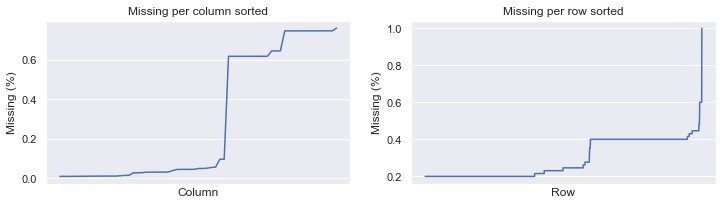

In [185]:
ts = data

fig, axs = plt.subplots(1, 2, figsize=(12, 3))

ts.isna().mean().sort_values().plot(xticks=[], title='Missing per column sorted', ax=axs[0])
axs[0].set(ylabel='Missing (%)', xlabel='Column')

ts.isna().mean(1).sort_values().reset_index(drop=True).plot(xticks=[], title='Missing per row sorted', ax=axs[1])
axs[1].set(ylabel='Missing (%)', xlabel='Row')

plt.show()

#### Save and reload clean data

In [698]:
# data.to_csv('Dados/Clean/INMET.csv', index=True)

data = pd.read_csv('Dados/Clean/INMET.csv', index_col=0)